In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
dataset = pd.read_csv(r'C:\Users\lonka\OneDrive\Desktop\Excel files\MNIST\train.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

### Checking distribution of data

C:\Users\lonka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


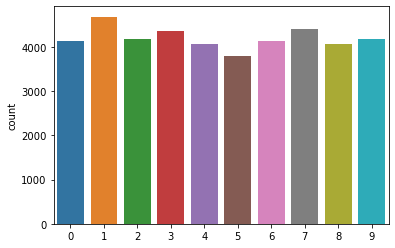

In [4]:
import seaborn as sns
sns.countplot(y)

### Check for Null Values

In [5]:
# Check IF some Feature variables are NaN
np.unique(np.isnan(X))[0]

False

In [6]:
# Check IF some Target Variables are NaN
np.unique(np.isnan(y))[0]

False

### Splitting Dataset into Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

### Feature Scaling


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Encoding Categorical Data into Continuous Variable

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. Building our ANN

### Importing the Keras libraries and packages

In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Initialising the ANN Model

In [12]:
# Initialising the ANN
classifier = Sequential()

### Adding Input Layer and Hidden Layers

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 784, activation = 'relu', input_dim = 784))

# Adding the second hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dropout(0.05))

### Adding Output Layer

In [14]:
# Adding the output layer
classifier.add(Dense(units = 10, activation = 'softmax'))

### Compiling our Model

In [15]:
# Compiling the ANN
classifier.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 3. Training our ANN

### Fitting the ANN to the Training set

In [16]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, 
                         validation_data = (X_test, y_test), 
                         batch_size = 28, 
                         epochs = 25)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/25
1350/1350 [==============================] - 9s 7ms/step - loss: 1.1663 - accuracy: 0.6085 - val_loss: 0.4382 - val_accuracy: 0.9029
Epoch 2/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.3492 - accuracy: 0.9047 - val_loss: 0.2382 - val_accuracy: 0.9331
Epoch 3/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.2239 - accuracy: 0.9392 - val_loss: 0.1921 - val_accuracy: 0.9431
Epoch 4/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1697 - accuracy: 0.9547 - val_loss: 0.1917 - val_accuracy: 0.9500
Epoch 5/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1302 - accuracy: 0.9646 - val_loss: 0.1632 - val_accuracy: 0.9550
Epoch 6/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.1021 - accuracy: 0.9732 - val_loss: 0.1644 - val_accuracy: 0.9593
Epoch 7/25
1350/1350 [==============================] - 9s 7ms/step - loss: 0.0818 - accuracy: 0.9775 - val_loss: 0.1665 - val_accuracy:

KeyError: 'acc'

# 4. Perfomance Evaluation

### Accuracy of Model

In [17]:
model_acc = classifier.evaluate(X_test, y_test)
print(" Model Accuracy is : {0:.1f}%".format(model_acc[1]*100))

132/132 [==============================] - 0s 4ms/step - loss: 0.2271 - accuracy: 0.9683
 Model Accuracy is : 96.8%


### Import the Test Data

In [19]:
test_dataset = pd.read_csv(r'C:\Users\lonka\OneDrive\Desktop\Excel files\MNIST\test.csv')
test = test_dataset.iloc[:,:].values

### Make Predictions for ' test ' data

In [20]:
# Prediction
test_pred = classifier.predict(test)

# Mark probability score > 0.5 as Predicted Label, axis = 1 means insert column-wise 
results = test_pred.argmax(axis=1)

### Visualize some test results

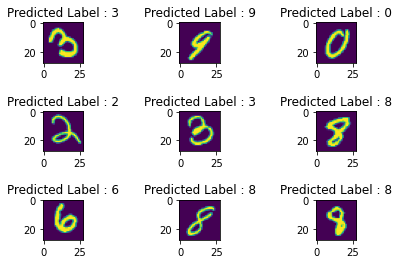

In [21]:
for i in range(1,10):
    index = np.random.randint(1,28001)
    plt.subplot(3,3,i)
    plt.imshow(test[index].reshape(28,28))
    plt.title("Predicted Label : {}".format(results[index]))
plt.subplots_adjust(hspace = 1.2, wspace = 1.2)
plt.show()
    

### Converting  Numpy Array format to Pandas Series and then to CSV format

In [22]:
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

### Check Submission file for correct format

In [23]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,9
4,5,3
